<a href="https://colab.research.google.com/github/solarslurpi/GrowBuddies/blob/main/growbuddiesproject/growbuddies/drgrowbuddy/ExploringCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download the Zip file containing the images we'll be using.

The Plant Village Dataset
After bumbling around the Internet, I found (the PlantVillage Dataset in Papers With Code)[https://paperswithcode.com/dataset/plantvillage].

In [ ]:
# Get the zipfile containing the images into Colab
from pathlib import Path
import zipfile

from google.colab import drive
drive.mount('/gdrive')

path = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'

if Path(path).exists():
    print(f"The path {path} exists.")
else:
    print(f"The path {path} does not exist.")
with zipfile.ZipFile(path, "r") as zip_ref:
    num_files = len(zip_ref.namelist())
    print(f"Number of files in the zip file: {num_files}")

Mounted at /gdrive
The path /gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip exists.
Number of files in the zip file: 55488


# Visualize Image Distribution

In [ ]:
# Build a directory of directory_name: number of images
from pathlib import Path
import zipfile

path = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'

dir_count = {}
with zipfile.ZipFile(path, 'r') as zip_ref:
    for file in zip_ref.namelist():
        p = Path(file)
        parent_dir = p.parent
        subdir_name = parent_dir.name
        # Check if the current subdir_name already exists as a key in the dir_count dictionary. 
        # If it does, increment the value associated with that key by 1. 
        # If it doesn't, it creates a new key-value pair in the dictionary
        if subdir_name in dir_count:
            dir_count[subdir_name] += 1
        else:
            dir_count[subdir_name] = 1

print(dir_count)

{'': 1, 'Plant_leave_diseases_dataset_without_augmentation': 39, 'Apple___Apple_scab': 630, 'Apple___Black_rot': 621, 'Apple___Cedar_apple_rust': 275, 'Apple___healthy': 1645, 'Background_without_leaves': 1143, 'Blueberry___healthy': 1502, 'Cherry___healthy': 854, 'Cherry___Powdery_mildew': 1052, 'Corn___Cercospora_leaf_spot Gray_leaf_spot': 513, 'Corn___Common_rust': 1192, 'Corn___healthy': 1162, 'Corn___Northern_Leaf_Blight': 985, 'Grape___Black_rot': 1180, 'Grape___Esca_(Black_Measles)': 1383, 'Grape___healthy': 423, 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 1076, 'Orange___Haunglongbing_(Citrus_greening)': 5507, 'Peach___Bacterial_spot': 2297, 'Peach___healthy': 360, 'Pepper,_bell___Bacterial_spot': 997, 'Pepper,_bell___healthy': 1478, 'Potato___Early_blight': 1000, 'Potato___healthy': 152, 'Potato___Late_blight': 1000, 'Raspberry___healthy': 371, 'Soybean___healthy': 5090, 'Squash___Powdery_mildew': 1835, 'Strawberry___healthy': 456, 'Strawberry___Leaf_scorch': 1109, 'Tomato__

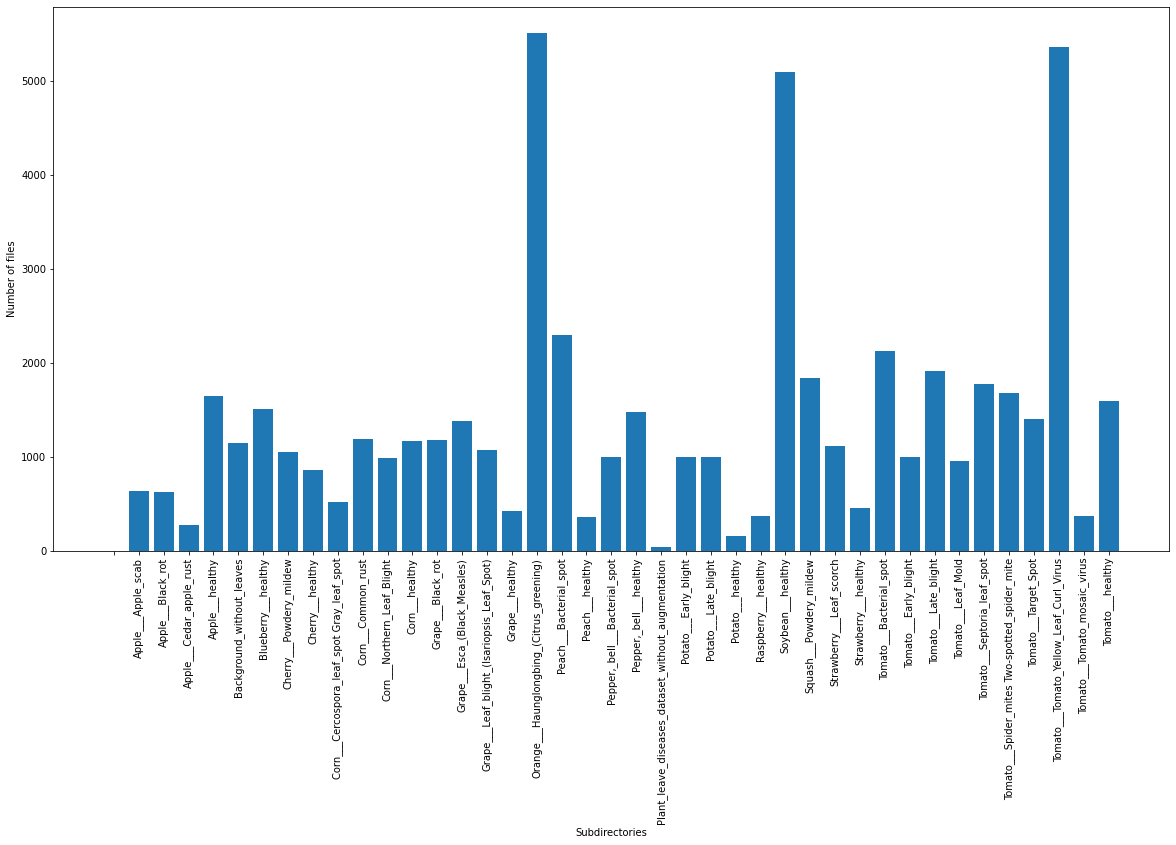

In [ ]:
import matplotlib.pyplot as plt
sorted_keys = sorted(dir_count.keys())
plt.figure(figsize=(20, 10))
plt.bar(sorted_keys, [dir_count[key] for key in sorted_keys])
plt.xticks(rotation=90)
plt.xlabel('Subdirectories')
plt.ylabel('Number of files')
#
plt.show()

# Copy Sample Image Files

In [ ]:
from pathlib import Path
from zipfile import ZipFile
import random
"""
The script uses the ZipFile module to open the zip file specified by the zip_filepath and iterates through the directories.
For each directory name, it checks if the name contains a string from the dir_names list. 
If the directory includes one of the strings in dir_names, the script 
takes a random sample of 10 files from the directory and extracts them to the specified target directory.  The target directory will be identified as either 
healthy_target_dir or unhealthy_target_dir. The extracted files are also renamed to include the name of the plant species in the file name.

The zip file should be specified at zip_filepath, and the target directories for the healthy and unhealthy images should 
be specified at healthy_target_dir and unhealthy_target_dir respectively. The dir_names variable contains a list of names 
of the plant species to be considered.
"""


# specify the zip file and the target directory
def pull_out_images(nImages_per_directory):
    zip_filepath = '/gdrive/MyDrive/Colab_datasets/Plant_leaf_diseases_dataset_without_augmentation.zip'
    healthy_target_dir = '/content/drgrowbuddy/healthy/'
    unhealthy_target_dir = '/content/drgrowbuddy/unhealthy/'
    # Path.mkdir('/content/healthy')
    dir_names = ["Apple","Grape","Pepper,_bell","Potato","Raspberry","Soybean","Strawberry"]
    # open the zip file
    with ZipFile(zip_filepath, 'r') as zip_ref:
        # iterate through the directories within the zip file
        for directory in (f for f in zip_ref.namelist() if f.endswith('/')):
          # Check if the directory name contains both an entry from the dir_names list as well as the word "healthy"
          if any(name in directory for name in dir_names):
            files = zip_ref.namelist()
            files = [file for file in files if directory in file]
            # take a random sample of files from the directory.
            files = random.sample(files,nImages_per_directory)
            dir_path = Path(directory)
            subdir_name = dir_path.parts[-1]
            for name in dir_names:
              if name in subdir_name:
                  short_dir_name = name
                  break

            for file in files:
                zip_info = zip_ref.getinfo(file)
                zip_info.filename = zip_info.filename.replace("image",short_dir_name)
                zip_info.filename = Path(zip_info.filename).name
                if "healthy" in directory:
                  target_dir = healthy_target_dir
                else:
                  target_dir = unhealthy_target_dir
                zip_ref.extract(zip_info, target_dir)


pull_out_images(100)


# Show a Random Image

There are a total of 1629 images.
-------------------------
Image path:  /content/drgrowbuddy/healthy/Soybean (2126).JPG
Fruit name:  Soybean
Class:       healthy
Image size:  (256, 256)
Image mode:  RGB


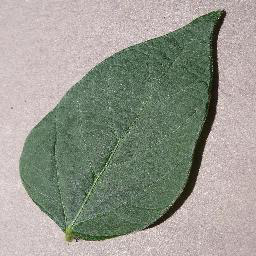

In [ ]:
from pathlib import Path
import random
from PIL import Image

# setup
healthy_dir = Path('/content/drgrowbuddy/healthy')
unhealthy_dir = Path('/content/drgrowbuddy/unhealthy')
# Get the list of filepaths
images_list = list(healthy_dir.glob('*.JPG')) + list(unhealthy_dir.glob('*.JPG'))
print(f"There are a total of {len(images_list)} images.")
chosen_image_path = random.choice(images_list)
file_name = chosen_image_path.parts[-1]
dir_names = ["Apple","Grape","Pepper,_bell","Potato","Raspberry","Soybean","Strawberry"]
fruit_name = [name for name in dir_names if name in file_name][0]
image = Image.open(chosen_image_path)
class_name = chosen_image_path.parent.stem
print("-------------------------")
# dir_names = ["Apple","Grape","Pepper,_bell","Potato","Raspberry","Soybean","Strawberry"]
#  # Can use matplotlib to show or just show by typing image on a line, e.g.: plt.imshow(image)
print("Image path: ", chosen_image_path)
print("Fruit name: ", fruit_name)
print("Class:      ", class_name)
print("Image size: ", image.size)
print("Image mode: ", image.mode)
image

# Build A DataSet and DataLoader

## Define the Transform Function

In [ ]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
# Write the transform for an image.
data_transform = transforms.Compose([
    # Resize the images to 64x64
    transforms.Resize(size=(64,64)),
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0 
])

## Build the Train and Test DataSets

In [ ]:

# Use imagefolder to create the PyTorch dataset (TorchVision)
from torchvision import datasets
# Get all samples
image_dataset = datasets.ImageFolder(root='/content/drgrowbuddy', transform = data_transform, target_transform=None)
# Create Train and Test Tensors.
from torch.utils.data import random_split

# Assume your dataset is called "my_dataset"
train_ratio = 0.8
train_size = int(train_ratio * len(image_dataset))
test_size = len(image_dataset) - train_size
# random_split returns torch.utils.data.dataset.Subset instances.
train_subset, test_subset = random_split(image_dataset, [train_size, test_size])
print(f"The image_dataset: {train_subset.dataset}")
print(f"The train subset contains {len(train_subset)} images.  The test subset contains {len(test_subset)}")

The image_dataset: Dataset ImageFolder
    Number of datapoints: 1630
    Root location: /content/drgrowbuddy
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
               ToTensor()
           )
The train subset contains 1304 images.  The test subset contains 326


In [ ]:
train_dataset.dataset.classes

['healthy', 'unhealthy']

## Make the DataLoaders

In [ ]:
import os
# Turn train and test datasets into DataLoaders
from torch.utils.data import DataLoader
def make_dataloaders(batch_size=1):
    NUM_WORKERS = os.cpu_count()
    print(f"--> in make_dataloaders.  Batch size is {batch_size}")
    train_dataloader = DataLoader(dataset=train_subset, 
                                  batch_size=batch_size,
                                  shuffle=True,
                                  num_workers=NUM_WORKERS)

    test_dataloader = DataLoader(dataset=test_subset,
                                batch_size=batch_size,
                                shuffle=False)
    return(train_dataloader, test_dataloader)

train_dataloader, test_dataloader = make_dataloaders(32)

--> in make_dataloaders.  Batch size is 32


# Build Model

## Use GPU
For Math intensive cells, best to use the GPU.

In [ ]:
# Setup device agnostic code
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

If device returned 'cpu', use GPU by going to the menu items: Runtime -> Change runtime type -> Hardware accelerator -> GPU. If you do this, your runtime will likely reset and you'll have to run all of the cells above by going Runtime -> Run before.

In [ ]:
from torch import nn
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1), # options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*16*16,
                      out_features=output_shape)
           nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.conv_block_1(x)
        print(x.shape)
        x = self.conv_block_2(x)
        print(x.shape)
        x = self.classifier(x)
        print(x.shape)
        return x
        # return self.classifier(self.conv_block_2(self.conv_block_1(x))) # <- leverage the benefits of operator fusion

torch.manual_seed(42)
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_subset.dataset.classes)).to(device)
model_0

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=2, bias=True)
  )
)

# Train and Test
see [Learn PyTorch](https://youtu.be/Z_ikDlimN6A?t=83011)
Try a forward pass on a single image.

In [ ]:
image_batch, label_batch = next(iter(train_dataloader))
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

## Step 1: Figure out the input shape of the Classifier
After running the below, we'll get an error if
```
nn.Linear(in_features=hidden_units,
          out_features=output_shape)
```
in_features is left at hidden_units (which is 10).  
```
torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])
---------------------------------------------------------------------------
RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x2560 and 10x2)
```
So we know the shape needs to be 2560 which is 10 x 16 x 16.  So change nn.Linear() to:
```
nn.Linear(in_features=hidden_units*16*16,
          out_features=output_shape)
```


In [ ]:
# Try a forward pass
model_0(image_batch.to(device))

torch.Size([32, 10, 32, 32])
torch.Size([32, 10, 16, 16])


RuntimeError: ignored

## 

This might happen:   
```
RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor
```
Recall we pinned model_0 to the GPU:
```
model_0 = TinyVGG(input_shape=3, # number of color channels (3 for RGB) 
                  hidden_units=10, 
                  output_shape=len(train_subset.dataset.classes)).to(device)
```
so we need to run the model on the GPU.
```
model_0(image_batch).to(device)
```
